In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve

In [34]:
train_features = pd.read_csv('./training_set_features.csv')
train_labels = pd.read_csv('./training_set_labels.csv')

test_features = pd.read_csv('./test_set_features.csv')

In [35]:
train_features.head(10)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [36]:
train_features.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [37]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [38]:
train_labels.head(20)

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
5,5,0,0
6,6,0,0
7,7,1,1
8,8,0,0
9,9,0,0


In [41]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   xyz_vaccine       26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


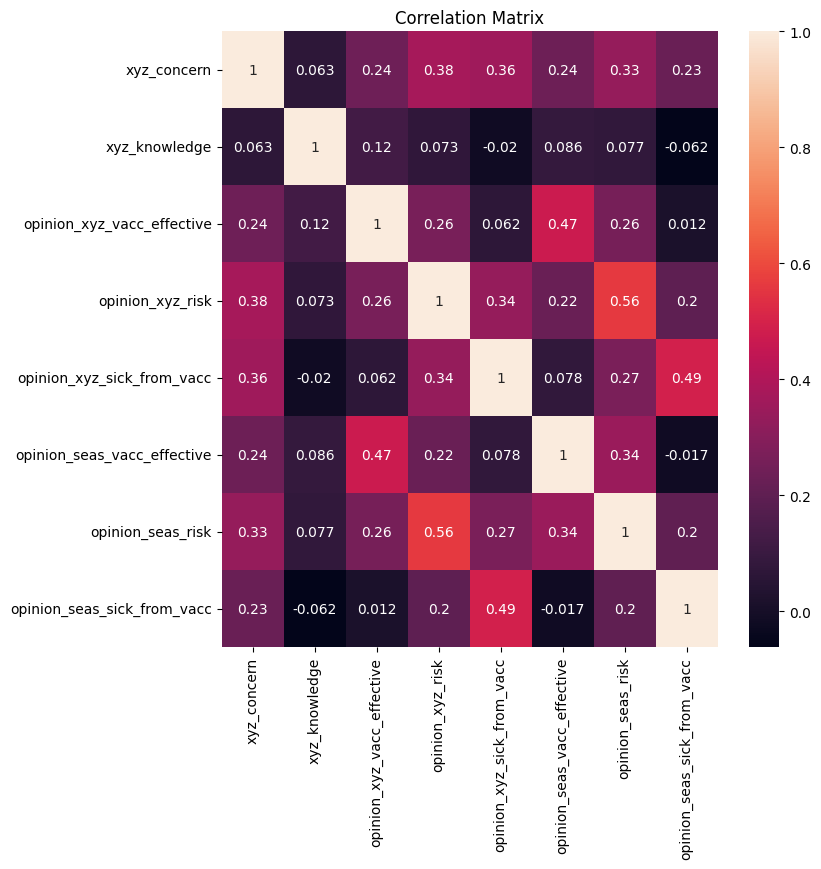

In [120]:
plt.figure(figsize=(8, 8))
correlation_matrix = train_features[['xyz_concern', 'xyz_knowledge', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [46]:
X_train = train_features.drop(columns=['respondent_id'])
# X_train
y_xyz = train_labels.xyz_vaccine
y_seasonal = train_labels.seasonal_vaccine
# y_seasonal

In [57]:
X_test = test_features.drop(columns=['respondent_id'])

In [60]:
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
numerical_features = ['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

In [59]:
imputer = SimpleImputer(strategy='most_frequent')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [66]:
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = one_hot.fit_transform(pd.DataFrame(X_train_imputed, columns=X_train.columns)[categorical_features])
X_test_encoded = one_hot.transform(pd.DataFrame(X_test_imputed, columns=X_test.columns)[categorical_features])

In [67]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(pd.DataFrame(X_train_imputed, columns=X_train.columns)[numerical_features])
X_test_scaled = scaler.transform(pd.DataFrame(X_test_imputed, columns=X_test.columns)[numerical_features])

In [68]:
X_train_preprocessed = np.hstack((X_train_scaled, X_train_encoded))
X_test_preprocessed = np.hstack((X_test_scaled, X_test_encoded))

In [126]:
logreg_xyz = LogisticRegression(random_state=0, max_iter=1000)
logreg_seasonal = LogisticRegression(random_state=0, max_iter=1000)
logreg_xyz.fit(X_train_preprocessed, y_xyz)
logreg_seasonal.fit(X_train_preprocessed, y_seasonal)

LogisticRegression(max_iter=1000, random_state=0)

In [127]:
y_xyz_train_predict_proba= logreg_xyz.predict_proba(X_train_preprocessed)[:, 1]
y_seasonal_train_predict_proba = logreg_seasonal.predict_proba(X_train_preprocessed)[:, 1]

In [128]:
xyz_auc_roc = roc_auc_score(y_xyz, y_xyz_train_predict_proba)
xyz_auc_roc

0.8379720817720332

In [129]:
seasonal_auc_roc = roc_auc_score(y_seasonal, y_seasonal_train_predict_proba)
seasonal_auc_roc

0.8559413828590284

In [130]:
print(f'xyz Vaccine ROC AUC = {xyz_auc_roc:.4f}')
print(f'Seasonal Vaccine ROC AUC = {seasonal_auc_roc:.4f}')
print(f'Mean ROC AUC = {(xyz_auc_roc + seasonal_auc_roc)/2:.4f}')

xyz Vaccine ROC AUC = 0.8380
Seasonal Vaccine ROC AUC = 0.8559
Mean ROC AUC = 0.8470


## xyz Vaccine ROC AUC = 0.8380
## Seasonal Vaccine ROC AUC = 0.8559
## Mean ROC AUC = 0.8470

In [131]:
y_test_pred_xyz = logreg_xyz.predict_proba(X_test_preprocessed)[:, 1]
y_test_pred_seasonal = logreg_seasonal.predict_proba(X_test_preprocessed)[:, 1]

# y_xyz_test_predict_proba = logreg_xyz.predict_proba(X_test_preprocessed)[:, 1]
# y_seasonal_test_predict_proba = logreg_seasonal.predict_proba(X_test_preprocessed)[:, 1]

In [132]:
final_submission = pd.DataFrame({'respondent_id': test_features['respondent_id'], 'h1n1_vaccine': y_test_pred_xyz, 'seasonal_vaccine': y_test_pred_seasonal})
final_submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.056441,0.295661
1,26708,0.048056,0.045246
2,26709,0.433710,0.582613
3,26710,0.497196,0.881339
4,26711,0.162161,0.465798
...,...,...,...
26703,53410,0.341929,0.520766
26704,53411,0.101576,0.281851
26705,53412,0.134227,0.198199
26706,53413,0.062279,0.368330


In [133]:
final_submission.to_csv('submission.csv', index=False)